In [1]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [75]:
DATASET = 'Tugas 2 ML Genap 2018-2019 Dataset Tanpa Label.csv'
N = 64 # number of neurons

## Fungsi untuk plotting

In [229]:
def plot(dataset, neurons, c1=None, c2='red'):
    colours = c1 if c1 else ['blue'] * len(dataset.index) 
    colours.extend([c2] * len(neurons.index))
    plt.scatter(pd.concat([dataset['x'], neurons['x']], ignore_index=True), 
                pd.concat([dataset['y'], neurons['y']], ignore_index=True),
                c=colours)
    plt.show()

## Baca input dari dataset

In [4]:
dataset = pd.read_csv(DATASET, header=None, names=['x', 'y'])
dataset

,x,y
0,9.802,10.132
1,10.350,9.768
2,10.098,9.988
3,9.730,9.910
4,9.754,10.430
5,9.836,9.902
6,10.238,9.866
7,9.530,9.862
8,10.154,9.820
9,9.336,10.456


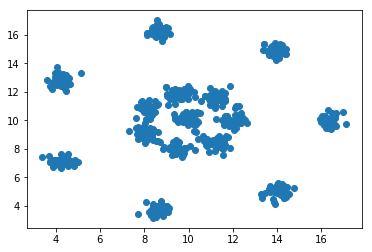

In [5]:
plt.scatter(dataset['x'], dataset['y'])
plt.show()

## Generate neuron dengan weight vector berdasarkan min dan max input

In [6]:
dataset_min = {'x': min(dataset['x']), 'y': min(dataset['y'])}
dataset_min

{'x': 3.4019999999999997, 'y': 3.178}

In [7]:
dataset_max = {'x': max(dataset['x']), 'y': max(dataset['y'])}
dataset_max

{'x': 17.124000000000002, 'y': 17.012}

In [76]:
n = [{
    'x': random.uniform(dataset_min['x'], dataset_max['x']), 
    'y': random.uniform(dataset_min['y'], dataset_max['y'])
} for _ in range(N)]
neurons = pd.DataFrame(data=n)
neurons

,x,y
0,9.717708,7.270190
1,9.513920,7.893886
2,11.991502,10.431102
3,15.180629,13.359151
4,8.777956,5.595624
5,14.118056,12.173689
6,10.137208,4.881449
7,5.378942,7.553452
8,16.618544,8.941405
9,7.786976,10.390658


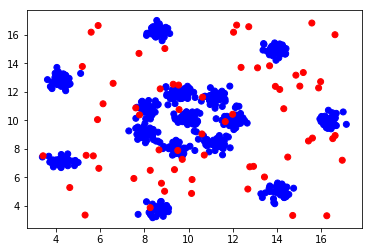

In [230]:
plot(dataset, neurons)

## Proses self-learning

In [137]:
SIG_0 = 4 # Initial sigma for neighbourhood function
TAU = 5 # Constant for updating sigma and learning rate
LR_0 = 0.5 # Initial learning rate

### Fungsi untuk mendapat nilai sigma berdasarkan iterasi (t)

In [131]:
def sigma(t):
    return SIG_0 * math.exp(-t/TAU)

### Fungsi ketetanggan antara dua neuron

In [132]:
def neighbourhood(sig_t, n1, n2):
    s = math.pow(sum(math.pow(n2[d] - n1[d], 2) for d in neurons), 0.5) # Literal distance
    return math.exp(-math.pow(s, 2) / 2 * math.pow(sig_t, 2))

### Fungsi untuk mendapat nilai learning rate berdasarkan iterasi (t)

In [133]:
def learning_rate(t):
    return LR_0 * math.exp(-t/TAU)

### Fungsi untuk mendapatkan delta untuk meng-update weight neuron

In [134]:
def update_weight(sig_t, lr_t, n, n_winner, x):
    delta = {}
    for d in neurons:
        nb = neighbourhood(sig_t, n_winner, n)
        delta[d] = lr_t *  nb * (x[d] - n[d])
    return delta

### Iterasi untuk meng-update weight setiap neuron berdasarkan tiap data input
Data input berjumlah 600. Satu epoch dihitung setiap semua data input telah teriterasi. Jumlah epoch di-set 5 sehingga jumlah iterasi yang terjadi untuk mengupdate neuron sebanyak 600 x 5 = 3000 iterasi.

0 Sigma: 4.0 LR: 0.5


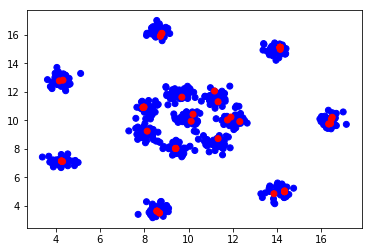

1 Sigma: 3.2749230123119273 LR: 0.4093653765389909


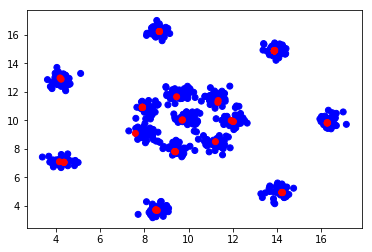

2 Sigma: 2.6812801841425573 LR: 0.33516002301781966


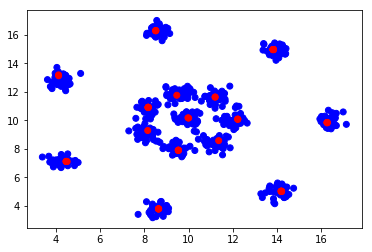

3 Sigma: 2.195246544376106 LR: 0.27440581804701325


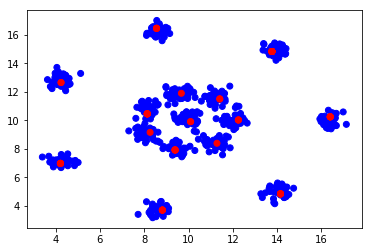

4 Sigma: 1.7973158564688863 LR: 0.22466448205861078


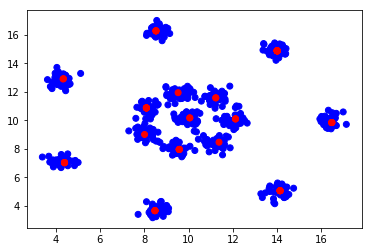

In [139]:
nb_iterations = 5
neurons_1 = neurons.sample(frac=1)

for t in range(nb_iterations):
    rand_dataset = dataset.sample(frac=1)
    sig = sigma(t)
    lr = learning_rate(t)
    print(t, "Sigma:", sig, "LR:", lr)
    for i, x in rand_dataset.iterrows():
        # Determine winner neuron
        min_dist = math.inf
        n_winner = 0
        j_winner = -1

        for j, n in neurons_1.iterrows():
            dist = sum(abs(n[d] - x[d]) for d in neurons)
            if dist < min_dist:
                min_dist = dist
                n_winner = n
                j_winner = j

        # Update weight for each neuron
        for j, n in neurons_1.iterrows():
            delta = update_weight(sig, lr, n, n_winner, x)
            for d in neurons:
                n[d] += delta[d]
        
    plot(rand_dataset, neurons_1)

## Tentukan centroid dengan jumlah minimal berdasarkan posisi-posisi neuron
Neuron berjumlah 64, tetapi yang menjadi centroid hanya 15 karena kebanyakan neuron-neuron tersebut overlap satu sama lain.

In [167]:
centroids = []
min_delta = 0.5
for i, n in neurons_1.iterrows():
    accept = True
    for c in centroids:
        delta = math.pow(sum(math.pow(c[d] - n[d], 2) for d in neurons), 0.5)
        if delta < min_delta:
            accept = False
            break
    if accept:
        centroids.append(n)
centroids = pd.DataFrame(data=centroids).reset_index(drop=True)
centroids

,x,y
0,8.098536,10.877795
1,14.002029,14.878412
2,4.404084,7.037602
3,8.482863,3.673165
4,14.133052,5.073284
5,8.530781,16.281421
6,16.465610,9.852995
7,9.581065,7.967973
8,8.015653,9.015378
9,11.230800,11.583744


## Klasifikasi input data berdasarkan centroids

In [224]:
classified_data = dataset.copy()
classes = []
colours = []
# Mapping colours
cmap = plt.cm.get_cmap('rainbow', len(centroids))

for i, x in classified_data.iterrows():
    min_dist = math.inf
    cls = -1
    for j, c in centroids.iterrows():
        dist = sum(abs(x[d] - c[d]) for d in neurons)
        if dist < min_dist:
            min_dist = dist
            cls = j
    classes.append(cls)
    colours.append(cmap(cls))
classified_data['class'] = classes

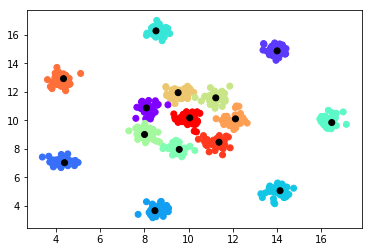

In [225]:
plot(dataset, centroids, colours, 'black')

In [227]:
classified_data.to_csv('TebakanTugas2.csv', index=False)